1.0 Import Modules and View data to be modeled

2.0 Linear Regression

3.0 K mean clustering

4.0 Decission Tree

5.0 Time Series Aggression Analysis



In [1]:
#Task 1.0

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error



warnings.filterwarnings('ignore')

In [2]:
#Task 1.1
#In prior EDA submission, I used price column to spit the data evenly into 80/20

xTrainModel=pd.read_csv(r'.\Data\UsedCarData\X_Train_Output.csv',header=0)
xTestModel=pd.read_csv(r'.\Data\UsedCarData\X_Test_Output.csv',header=0)
yTrainModel=pd.read_csv(r'.\Data\UsedCarData\y_Train_Output.csv',header=0)
yTestModel=pd.read_csv(r'.\Data\UsedCarData\y_Test_Output.csv',header=0)
usedvehicle=pd.read_csv(r'.\Data\UsedCarData\clean_vehicles2.csv', header=0 )

In [3]:
#Task 1.2.0
xTrainModel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97398 entries, 0 to 97397
Columns: 104 entries, year to paint_color_yellow
dtypes: float64(104)
memory usage: 77.3 MB


In [4]:
#Task 1.2.1
xTrainModel.head()

,year,odometer,lat,long,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_unknown,manufacturer_volkswagen,manufacturer_volvo,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_10 cylinders,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,transmission_unknown,drive_4wd,drive_fwd,drive_rwd,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_unknown,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,0.769597,-0.018569,-0.395799,0.683996,-0.099194,-0.01841,-0.003204,-0.104845,-0.162974,-0.113743,-0.119178,-0.417091,-0.129112,-0.013213,-0.188236,-0.013596,-0.036558,-0.460408,-0.20284,-0.016023,-0.239243,-0.146812,-0.108585,-0.05577,-0.229145,-0.131314,-0.008478,-0.1338,-0.096249,-0.106188,-0.156105,-0.06217,-0.068206,-0.084345,-0.230655,-0.088564,-0.054268,-0.187856,-0.058218,-0.060226,-0.149777,-0.01841,3.332664,-0.212735,-0.141657,-0.083351,1.113466,-0.185026,-0.822427,-0.349682,-0.073828,-0.05083,-0.08714,-0.028128,-0.046262,-0.668425,-0.091917,1.310824,-0.656728,-0.056047,-0.263444,-0.039795,0.319334,-0.107612,-0.121765,0.238571,-0.087617,-0.049074,-0.024199,-0.175679,-0.116128,0.461341,-0.292805,-0.32668,-0.009613,1.188492,-0.713372,-0.574623,1.906255,-0.041069,-0.171727,-0.270309,-0.195145,-0.149741,-0.063975,-0.16314,-0.332557,-0.569454,-0.385823,-0.278743,-0.166198,-0.157343,-0.478844,-0.348702,-0.170551,-0.149777,-0.184014,2.933322,-0.081648,-0.05678,-0.348961,-0.405077,-0.575762,-0.098824
1,0.385268,0.395623,-1.018158,-0.252200,-0.099194,-0.01841,-0.003204,-0.104845,-0.162974,-0.113743,-0.119178,2.397558,-0.129112,-0.013213,-0.188236,-0.013596,-0.036558,-0.460408,-0.20284,-0.016023,-0.239243,-0.146812,-0.108585,-0.05577,-0.229145,-0.131314,-0.008478,-0.1338,-0.096249,-0.106188,-0.156105,-0.06217,-0.068206,-0.084345,-0.230655,-0.088564,-0.054268,-0.187856,-0.058218,-0.060226,-0.149777,-0.01841,-0.300060,-0.212735,-0.141657,-0.083351,-0.898096,-0.185026,-0.822427,2.859738,-0.073828,-0.05083,-0.08714,-0.028128,-0.046262,-0.668425,-0.091917,1.310824,-0.656728,-0.056047,-0.263444,-0.039795,0.319334,-0.107612,-0.121765,0.238571,-0.087617,-0.049074,-0.024199,-0.175679,-0.116128,0.461341,-0.292805,-0.32668,-0.009613,-0.841402,1.401792,-0.574623,-0.524589,-0.041069,-0.171727,-0.270309,-0.195145,-0.149741,-0.063975,-0.16314,-0.332557,1.756068,-0.385823,-0.278743,-0.166198,-0.157343,-0.478844,-0.348702,-0.170551,-0.149777,-0.184014,-0.340910,-0.081648,-0.05678,2.865651,-0.405077,-0.575762,-0.098824
2,0.385268,0.347759,0.721880,0.534455,-0.099194,-0.01841,-0.003204,-0.104845,-0.162974,8.791713,-0.119178,-0.417091,-0.12911

In [5]:
#Task 1.2.2
yTrainModel.head()

,price
0,10.568775
1,7.170888
2,8.922125
3,7.378384
4,7.438972


In [6]:
yTrainModel

,price
0,10.568775
1,7.170888
2,8.922125
3,7.378384
4,7.438972
...,...
97393,9.190240
97394,8.986697
97395,9.159152
97396,9.472782


In [7]:
#Task 1.2.3
xTestModel.head()

,year,odometer,lat,long,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_unknown,manufacturer_volkswagen,manufacturer_volvo,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_10 cylinders,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,transmission_unknown,drive_4wd,drive_fwd,drive_rwd,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_unknown,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,1.057843,-3.728053,0.603415,1.195684,-0.099194,-0.01841,-0.003204,-0.104845,-0.162974,-0.113743,-0.119178,-0.417091,-0.129112,-0.013213,-0.188236,-0.013596,-0.036558,2.171986,-0.20284,-0.016023,-0.239243,-0.146812,-0.108585,-0.05577,-0.229145,-0.131314,-0.008478,-0.1338,-0.096249,-0.106188,-0.156105,-0.06217,-0.068206,-0.084345,-0.230655,-0.088564,-0.054268,-0.187856,-0.058218,-0.060226,-0.149777,-0.01841,-0.300060,-0.212735,-0.141657,-0.083351,-0.898096,-0.185026,1.215914,-0.349682,-0.073828,-0.05083,-0.08714,-0.028128,-0.046262,-0.668425,-0.091917,-0.762879,1.522700,-0.056047,-0.263444,-0.039795,0.319334,-0.107612,-0.121765,0.238571,-0.087617,-0.049074,-0.024199,-0.175679,-0.116128,-2.167592,-0.292805,3.061097,-0.009613,-0.841402,-0.713372,1.740270,-0.524589,-0.041069,-0.171727,3.699469,-0.195145,-0.149741,-0.063975,-0.16314,-0.332557,-0.569454,-0.385823,-0.278743,-0.166198,-0.157343,-0.478844,2.867781,-0.170551,-0.149777,-0.184014,-0.34091,-0.081648,-0.05678,-0.348961,-0.405077,-0.575762,-0.098824
1,0.481350,0.010813,0.222783,-0.725117,-0.099194,-0.01841,-0.003204,-0.104845,-0.162974,-0.113743,-0.119178,2.397558,-0.129112,-0.013213,-0.188236,-0.013596,-0.036558,-0.460408,-0.20284,-0.016023,-0.239243,-0.146812,-0.108585,-0.05577,-0.229145,-0.131314,-0.008478,-0.1338,-0.096249,-0.106188,-0.156105,-0.06217,-0.068206,-0.084345,-0.230655,-0.088564,-0.054268,-0.187856,-0.058218,-0.060226,-0.149777,-0.01841,-0.300060,-0.212735,-0.141657,-0.083351,1.113466,-0.185026,-0.822427,-0.349682,-0.073828,-0.05083,-0.08714,-0.028128,-0.046262,-0.668425,-0.091917,-0.762879,1.522700,-0.056047,-0.263444,-0.039795,0.319334,-0.107612,-0.121765,0.238571,-0.087617,-0.049074,-0.024199,-0.175679,-0.116128,0.461341,-0.292805,-0.326680,-0.009613,1.188492,-0.713372,-0.574623,-0.524589,-0.041069,-0.171727,-0.270309,-0.195145,-0.149741,-0.063975,-0.16314,-0.332557,-0.569454,-0.385823,-0.278743,6.016910,-0.157343,-0.478844,-0.348702,-0.170551,-0.149777,-0.184014,-0.34091,-0.081648,-0.05678,-0.348961,-0.405077,1.736830,-0.098824
2,0.385268,0.362333,0.024540,-1.670527,-0.099194,-0.01841,-0.003204,-0.104845,-0.162974,-0.113743,-0.119178,-0.417091,-0.12911

In [8]:
#Task 1.2.4
yTestModel.head()

,price
0,10.596410
1,0.000000
2,9.472705
3,8.779711
4,9.104535


In [9]:
#Task 1.3.1
xTrainModel.shape

(97398, 104)

In [10]:
#Task 1.3.2
yTrainModel.shape

(97398, 1)

In [11]:
#Task 1.3.3
xTestModel.shape

(32467, 104)

In [12]:
#Task 1.3.4
yTestModel.shape

(32467, 1)

# Task 2.0

Linear Regression   

In [13]:
# Task 2.1

# Create the model: make a variable called rModel, and use it linear_model.LinearRegression appropriately
rModel = linear_model.LinearRegression(normalize=True)


In [14]:
# Task 2.2

# We now want to train the model on our test data.
rModel.fit(xTrainModel,yTrainModel)


LinearRegression(normalize=True)

In [15]:
# Task 2.3

# Evaluate the model  
print(rModel.score(xTrainModel,yTrainModel))

0.08864007743896629


In [16]:
# Task 2.4

# Use the model to make predictions about our test data
y_pred = rModel.predict(xTestModel)
y_pred

array([[10.71234912],
       [ 8.95075244],
       [ 8.87250537],
       ...,
       [ 9.44184131],
       [ 9.14496631],
       [ 8.41449756]])

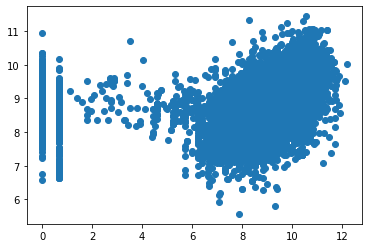

In [17]:
# Task 2.5

# Let's plot the predictions against the actual result. Use scatter()
plt.scatter(yTestModel,y_pred)

In [18]:
# Task 2.6

#r2 or mean square error report or root mean square
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


#test Train data


In [19]:
# Task 2.7

#test data



# Put the predictions & actual values into a dataframe
matches = pd.DataFrame(yTestModel)
matches.rename(columns={'price':'actual'},inplace=True)
matches["predictions"]=y_pred

rmse(matches["actual"],matches['predictions'])


2.0580459327677842

# Task 3.0

Random Forest Regressor


In [20]:
#reimport yTestModel
yTestModel=pd.read_csv(r'.\Data\UsedCarData\y_Test_Output.csv',header=0)

In [21]:
#Task 3.1

RandomForestRegModel = RandomForestRegressor()
RandomForestRegModel.fit(xTrainModel,yTrainModel)

RandomForestRegressor()

In [22]:
#Task 3.2

y_pred2 = RandomForestRegModel.predict(xTestModel)
y_pred2

array([10.594302  ,  6.17489062,  9.54648303, ..., 10.08543404,
        9.78528677,  9.04480544])

In [23]:
#Task 3.3

mse2 = mean_squared_error(yTestModel, y_pred2)
mse2

1.3086390283329206

In [24]:
rsme2= np.sqrt(mse2)
rsme2

1.1439576164932512

# Task 4.0

Support Vector Regression

https://heartbeat.fritz.ai/support-vector-regression-in-python-using-scikit-learn-89cc18e933b7


In [25]:
# Task 4.1

SupportVectorRegModel=SVR()
SupportVectorRegModel.fit(xTrainModel,yTrainModel)

SVR()

In [26]:
# Task 4.2

y_pred3 = SupportVectorRegModel.predict(xTestModel)
y_pred3

array([10.49804805, 10.09978469,  9.37243711, ..., 10.06926806,
       10.0005239 ,  9.25051317])

In [27]:
# Task 4.3

mse3 = mean_squared_error(yTestModel, y_pred3)
mse3

4.118647644350439

In [28]:
# Task 4.4

rmse=np.sqrt(mse3)
rmse

2.029445156773259

In this modeling it was much different from the capstone2 where there were more thing to compare with. In this I only have RSME

The worst method for calculating RSME was the support vector regressor. It took more than 3 hours to calculate the value.

The best method was Random Forest Regressor. It was the quickest to run and the lowest RSME out of the 3. 

<img src="ModelOutcome.JPG">


used on of the r2 or mean square error